In [11]:
# 1. Решить задачу классификации для синтетического примера
# 2. Реализовать python-класс - логистическую регрессию
# 3. Посчитать метрику (accuracy) для х_test

import math
import numpy as np
from sklearn import datasets
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [12]:
# Вычислим TP, TN, FP, FN
def compute_tp_tn_fn_fp(y_act, y_pred):
    tp = sum((y_act == 1) & (y_pred == 1)) # True positive - Истина = 1, Предсказание = 1
    tn = sum((y_act == 0) & (y_pred == 0)) # False positive - Истина = 1, Предсказание = 0
    fn = sum((y_act == 1) & (y_pred == 0)) # False negative - Истина = 0, Предсказание = 1
    fp = sum((y_act == 0) & (y_pred == 1)) # True negative - Истина = 0, Предсказание = 0
    return tp, tn, fp, fn

In [13]:
# После этого по формулам уже просто вычислить метрики
def compute_accuracy(tp, tn, fn, fp):
    return (tp + tn) / (tp + tn + fn + fp)

def compute_precision(tp, fp):
    return tp / (tp + fp)

def compute_recall(tp, fn):
    return tp / (tp + fn)

def compute_f1_score(precision, recall):
    return 2 * precision * recall / (precision + recall)

def metrics_report(y_true, y_pred):
    tp, tn, fp, fn = compute_tp_tn_fn_fp(y_true, y_pred)
    accurancy = compute_accuracy(tp, tn, fn, fp)
    precision = compute_precision(tp, fp)
    recall = compute_recall(tp, fn)
    f1_score = compute_f1_score(precision, recall)
    print(f'Precision: {precision:.2}\nRecall: {recall:.2}\nF1: {f1_score:.2}')
    print(f'Accuracy: {accurancy}')

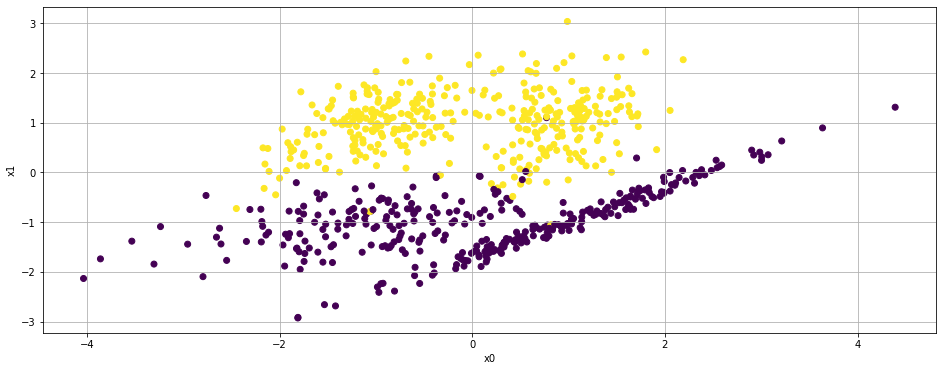

In [14]:
from sklearn.datasets import make_classification

dataset = make_classification(n_samples=1000,n_redundant=0,n_repeated=0, n_features=2,n_informative=2, random_state=45,  n_classes=2)
X = dataset[0]
y = dataset[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)
k1 = 0
k2 = 1
plt.figure(figsize=(16, 6))
plt.xlabel('x'+str(k1))
plt.ylabel('x'+str(k2))
plt.scatter(X_train[:,k1],X_train[:,k2], c = y_train)
plt.grid('True')
plt.show()

In [15]:
from sklearn.metrics import classification_report

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       158
           1       0.95      0.96      0.95       142

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



In [16]:
tp, tn, fp, fn = compute_tp_tn_fn_fp(y_test, y_pred)
metrics_report(y_test, y_pred)

Precision: 0.95
Recall: 0.96
F1: 0.95
Accuracy: 0.9566666666666667


In [25]:
# функция логистической регрессии
# на вход принимаем:
# Xb - массив со всеми параметрами и результатами (результат - первый столбец)
# w - веса
def log_regr(Xb, w):
    params = - Xb.dot(w)
    r = np.zeros (params.shape[0]) # Возвращает массив np
    for i in range(len(r)):
        r[i] = 1 /(1 + math.exp(params[i]))
    return r

# определим еще одну функцию с округлениями полученных значений
def log_regr2(Xb, w):
    params = - Xb.dot(w)
    r = np.zeros (params.shape[0]) # Возвращает массив np
    for i in range(len(r)):
        r[i] = 1 /(1 + math.exp(params[i]))
        if r[i] >=0.5:
            r[i] = 1
        else:
            r[i] = 0
    return r

In [38]:
# создадим класс логистической регресии
class LRegression(object):
    w = None
    m = 0
    # Обучение
    # X - матрица с фичами
    # y - матрица целевой фичи
    # learn_r - шаг для градиентного спуска
    # accuracy - первоначальная точность
    def fit(self, X ,y, learn_r = 0.02, accuracy = 0.00001):
        # устанавливаем параметры для весов = 0.5 исходя из количество столбцов + 1
        self.w = np.full(X.shape[1]+1,0.5)
        # количество строк
        self.m = X.shape[0]
        # Вставить первый столбец как 1, формируя матрицу Xb
        a = np.full((self.m,1),1)
        Xb = np.column_stack((a,X))
        # Итерация градиентного спуска
        count = 1
        while True:
            # получаем значение потерь
            oldJ = self.log_loss(Xb, y)
            c = log_regr(Xb, self.w) - y
            # изменяем веса
            for j in range(len(self.w)):
                self.w[j] = self.w[j] - learn_r * np.sum(c * Xb[:,j])
            # получаем новые значения потерь
            newJ = self.log_loss(Xb, y)
            if newJ == oldJ or math.fabs(newJ - oldJ) < accuracy:
                print ('Функция стоимости повторяется до минимального значения, выход!')
                print ('Сходимость к:', newJ)
                break
            print ('Номер итерации', count, 'Time!')
            print ('Последнее отличие функции стоимости:', (newJ-oldJ))
            count += 1
 
    def log_loss(self, Xb, y):
        sum = 0.0
        for i in range(self.m):
            yPre = self._sigmod(Xb[i,], self.w)
#             print("yPre:",yPre)
            if yPre == 1 or yPre == 0:
                return 0
            sum += y[i]*math.log(yPre)+(1 - y[i])*math.log(1-yPre)
        return -1/self.m * sum
    
    def _sigmod(self, Xi, w):
        params = - np.sum(Xi * w)
        r = 1 /(1 + math.exp(params))
        return r
 
    # прогноз с использованием метода с округлениями
    def predict(self, X):
        a = np.full((len(X), 1), 1)
        Xb = np.column_stack((a, X))
        return log_regr2(Xb, self.w)

In [39]:
# проверяем что вышло
lr = LRegression()    
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
print ('Параметры:', lr.w)
print(classification_report(y_test, y_predict))

Номер итерации 1 Time!
Последнее отличие функции стоимости: -0.34390306615244226
Номер итерации 2 Time!
Последнее отличие функции стоимости: -0.11925493001080856
Номер итерации 3 Time!
Последнее отличие функции стоимости: -0.00659424738661106
Номер итерации 4 Time!
Последнее отличие функции стоимости: -0.00205041134113855
Номер итерации 5 Time!
Последнее отличие функции стоимости: -0.0006726357108374076
Номер итерации 6 Time!
Последнее отличие функции стоимости: -0.00021753186212761233
Номер итерации 7 Time!
Последнее отличие функции стоимости: -7.405397596918495e-05
Номер итерации 8 Time!
Последнее отличие функции стоимости: -2.9615058053419907e-05
Номер итерации 9 Time!
Последнее отличие функции стоимости: -1.5530935655705402e-05
Номер итерации 10 Time!
Последнее отличие функции стоимости: -1.0622201328691627e-05
Функция стоимости повторяется до минимального значения, выход!
Сходимость к: 0.10821997783835388
Параметры: [ 0.54487468 -1.15828114  5.70087506]
              precision    

In [40]:
tp, tn, fp, fn = compute_tp_tn_fn_fp(y_test, y_predict)
metrics_report(y_test, y_pred)

Precision: 0.95
Recall: 0.96
F1: 0.95
Accuracy: 0.9566666666666667
